## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  55.605403  1138.144363  0.234903  6.006058  1.330188
1  50.504144  1514.482511  0.960354  2.152246  1.616222
2  77.010861  1153.456327  0.247442  3.897966  1.313175
3  31.569110  1476.598926  0.529504  6.318840  1.533288
4  43.184697   548.622543  0.184561  8.124638  1.017087


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.40648 | train_mse: 6.29363 | train_mae: 1.89682 |  0:00:00s
epoch 1  | loss: 0.75152 | train_mse: 2.46392 | train_mae: 1.15873 |  0:00:00s
epoch 2  | loss: 0.61944 | train_mse: 3.10049 | train_mae: 1.30225 |  0:00:00s


epoch 3  | loss: 0.56737 | train_mse: 4.42188 | train_mae: 1.35589 |  0:00:00s
epoch 4  | loss: 0.39533 | train_mse: 5.51344 | train_mae: 1.38556 |  0:00:00s
epoch 5  | loss: 0.42025 | train_mse: 4.64602 | train_mae: 1.28646 |  0:00:00s


epoch 6  | loss: 0.27718 | train_mse: 4.34661 | train_mae: 1.27933 |  0:00:00s
epoch 7  | loss: 0.45641 | train_mse: 3.94979 | train_mae: 1.23476 |  0:00:00s
epoch 8  | loss: 0.34113 | train_mse: 2.70337 | train_mae: 1.05019 |  0:00:00s


epoch 9  | loss: 0.31775 | train_mse: 1.53319 | train_mae: 0.81254 |  0:00:01s
epoch 10 | loss: 0.29442 | train_mse: 1.34128 | train_mae: 0.7517  |  0:00:01s
epoch 11 | loss: 0.34688 | train_mse: 1.25383 | train_mae: 0.73787 |  0:00:01s


epoch 12 | loss: 0.28964 | train_mse: 1.11185 | train_mae: 0.71231 |  0:00:01s
epoch 13 | loss: 0.42456 | train_mse: 1.06389 | train_mae: 0.65794 |  0:00:01s
epoch 14 | loss: 0.35203 | train_mse: 0.73549 | train_mae: 0.58189 |  0:00:01s


epoch 15 | loss: 0.51865 | train_mse: 0.65293 | train_mae: 0.55797 |  0:00:01s
epoch 16 | loss: 0.28198 | train_mse: 0.67079 | train_mae: 0.56906 |  0:00:01s
epoch 17 | loss: 0.38286 | train_mse: 0.69804 | train_mae: 0.58187 |  0:00:01s


epoch 18 | loss: 0.34684 | train_mse: 0.5633  | train_mae: 0.50716 |  0:00:01s
epoch 19 | loss: 0.22014 | train_mse: 0.54241 | train_mae: 0.48068 |  0:00:01s
epoch 20 | loss: 0.36176 | train_mse: 0.36868 | train_mae: 0.41636 |  0:00:02s


epoch 21 | loss: 0.27745 | train_mse: 0.32568 | train_mae: 0.3977  |  0:00:02s
epoch 22 | loss: 0.25764 | train_mse: 0.29117 | train_mae: 0.38796 |  0:00:02s
epoch 23 | loss: 0.17492 | train_mse: 0.27009 | train_mae: 0.36768 |  0:00:02s


epoch 24 | loss: 0.26567 | train_mse: 0.30179 | train_mae: 0.38786 |  0:00:02s
epoch 25 | loss: 0.33771 | train_mse: 0.23    | train_mae: 0.3497  |  0:00:02s
epoch 26 | loss: 0.25344 | train_mse: 0.26938 | train_mae: 0.35865 |  0:00:02s


epoch 27 | loss: 0.34821 | train_mse: 0.35675 | train_mae: 0.37013 |  0:00:02s
epoch 28 | loss: 0.34906 | train_mse: 0.28442 | train_mae: 0.35275 |  0:00:02s
epoch 29 | loss: 0.28403 | train_mse: 0.23074 | train_mae: 0.33772 |  0:00:02s


epoch 30 | loss: 0.25257 | train_mse: 0.18292 | train_mae: 0.30027 |  0:00:02s
epoch 31 | loss: 0.2727  | train_mse: 0.18326 | train_mae: 0.32812 |  0:00:03s
epoch 32 | loss: 0.21223 | train_mse: 0.18707 | train_mae: 0.33094 |  0:00:03s


epoch 33 | loss: 0.16491 | train_mse: 0.21047 | train_mae: 0.33253 |  0:00:03s
epoch 34 | loss: 0.20865 | train_mse: 0.15961 | train_mae: 0.2857  |  0:00:03s
epoch 35 | loss: 0.29169 | train_mse: 0.18021 | train_mae: 0.29964 |  0:00:03s


epoch 36 | loss: 0.16462 | train_mse: 0.16014 | train_mae: 0.27432 |  0:00:03s
epoch 37 | loss: 0.33232 | train_mse: 0.18054 | train_mae: 0.29113 |  0:00:03s


epoch 38 | loss: 0.27181 | train_mse: 0.13698 | train_mae: 0.26293 |  0:00:03s
epoch 39 | loss: 0.27206 | train_mse: 0.11455 | train_mae: 0.2539  |  0:00:03s


epoch 40 | loss: 0.27367 | train_mse: 0.21447 | train_mae: 0.3086  |  0:00:03s
epoch 41 | loss: 0.23233 | train_mse: 0.21943 | train_mae: 0.33628 |  0:00:03s
epoch 42 | loss: 0.28157 | train_mse: 0.20074 | train_mae: 0.33195 |  0:00:04s
epoch 43 | loss: 0.20809 | train_mse: 0.17878 | train_mae: 0.30943 |  0:00:04s


epoch 44 | loss: 0.26296 | train_mse: 0.1957  | train_mae: 0.32248 |  0:00:04s
epoch 45 | loss: 0.20688 | train_mse: 0.12493 | train_mae: 0.26055 |  0:00:04s


epoch 46 | loss: 0.21939 | train_mse: 0.12385 | train_mae: 0.25452 |  0:00:04s
epoch 47 | loss: 0.17752 | train_mse: 0.11075 | train_mae: 0.24746 |  0:00:04s


epoch 48 | loss: 0.15158 | train_mse: 0.09857 | train_mae: 0.24518 |  0:00:04s
epoch 49 | loss: 0.2767  | train_mse: 0.10406 | train_mae: 0.24997 |  0:00:04s


epoch 50 | loss: 0.14239 | train_mse: 0.13671 | train_mae: 0.27988 |  0:00:04s
epoch 51 | loss: 0.15212 | train_mse: 0.12809 | train_mae: 0.28333 |  0:00:04s


epoch 52 | loss: 0.23676 | train_mse: 0.1463  | train_mae: 0.30186 |  0:00:05s
epoch 53 | loss: 0.25547 | train_mse: 0.16062 | train_mae: 0.30617 |  0:00:05s
epoch 54 | loss: 0.24654 | train_mse: 0.14559 | train_mae: 0.29359 |  0:00:05s


epoch 55 | loss: 0.23687 | train_mse: 0.13867 | train_mae: 0.28375 |  0:00:05s
epoch 56 | loss: 0.15299 | train_mse: 0.10553 | train_mae: 0.25012 |  0:00:05s
epoch 57 | loss: 0.24897 | train_mse: 0.11725 | train_mae: 0.26583 |  0:00:05s


epoch 58 | loss: 0.13691 | train_mse: 0.11297 | train_mae: 0.2551  |  0:00:05s
epoch 59 | loss: 0.35405 | train_mse: 0.11458 | train_mae: 0.26244 |  0:00:05s
epoch 60 | loss: 0.13785 | train_mse: 0.12355 | train_mae: 0.26794 |  0:00:05s


epoch 61 | loss: 0.16787 | train_mse: 0.14517 | train_mae: 0.29404 |  0:00:05s
epoch 62 | loss: 0.32388 | train_mse: 0.13004 | train_mae: 0.28027 |  0:00:05s
epoch 63 | loss: 0.16734 | train_mse: 0.1411  | train_mae: 0.28335 |  0:00:06s


epoch 64 | loss: 0.19115 | train_mse: 0.16637 | train_mae: 0.29888 |  0:00:06s
epoch 65 | loss: 0.127   | train_mse: 0.11174 | train_mae: 0.25207 |  0:00:06s
epoch 66 | loss: 0.21683 | train_mse: 0.09172 | train_mae: 0.22359 |  0:00:06s


epoch 67 | loss: 0.14746 | train_mse: 0.09026 | train_mae: 0.22    |  0:00:06s
epoch 68 | loss: 0.19655 | train_mse: 0.09953 | train_mae: 0.23576 |  0:00:06s
epoch 69 | loss: 0.15258 | train_mse: 0.10206 | train_mae: 0.23049 |  0:00:06s


epoch 70 | loss: 0.13875 | train_mse: 0.09784 | train_mae: 0.23374 |  0:00:06s
epoch 71 | loss: 0.27192 | train_mse: 0.11727 | train_mae: 0.25518 |  0:00:06s
epoch 72 | loss: 0.17291 | train_mse: 0.10177 | train_mae: 0.24188 |  0:00:06s


epoch 73 | loss: 0.13797 | train_mse: 0.10527 | train_mae: 0.24421 |  0:00:06s
epoch 74 | loss: 0.1559  | train_mse: 0.10772 | train_mae: 0.24049 |  0:00:06s
epoch 75 | loss: 0.11534 | train_mse: 0.12145 | train_mae: 0.25564 |  0:00:07s


epoch 76 | loss: 0.30881 | train_mse: 0.12672 | train_mae: 0.26787 |  0:00:07s
epoch 77 | loss: 0.2131  | train_mse: 0.12167 | train_mae: 0.26047 |  0:00:07s
epoch 78 | loss: 0.26395 | train_mse: 0.11738 | train_mae: 0.25038 |  0:00:07s


epoch 79 | loss: 0.16041 | train_mse: 0.10078 | train_mae: 0.22643 |  0:00:07s
epoch 80 | loss: 0.19472 | train_mse: 0.11458 | train_mae: 0.24675 |  0:00:07s
epoch 81 | loss: 0.10391 | train_mse: 0.13164 | train_mae: 0.27527 |  0:00:07s


epoch 82 | loss: 0.16343 | train_mse: 0.14285 | train_mae: 0.29028 |  0:00:07s
epoch 83 | loss: 0.18084 | train_mse: 0.15891 | train_mae: 0.30029 |  0:00:07s
epoch 84 | loss: 0.19614 | train_mse: 0.14743 | train_mae: 0.2858  |  0:00:07s


epoch 85 | loss: 0.21527 | train_mse: 0.12291 | train_mae: 0.26112 |  0:00:07s
epoch 86 | loss: 0.10517 | train_mse: 0.10846 | train_mae: 0.24121 |  0:00:08s
epoch 87 | loss: 0.09016 | train_mse: 0.0996  | train_mae: 0.22832 |  0:00:08s


epoch 88 | loss: 0.10208 | train_mse: 0.09431 | train_mae: 0.22698 |  0:00:08s
epoch 89 | loss: 0.106   | train_mse: 0.08302 | train_mae: 0.21203 |  0:00:08s
epoch 90 | loss: 0.11834 | train_mse: 0.08182 | train_mae: 0.21445 |  0:00:08s


epoch 91 | loss: 0.16593 | train_mse: 0.09031 | train_mae: 0.23228 |  0:00:08s
epoch 92 | loss: 0.142   | train_mse: 0.07786 | train_mae: 0.21317 |  0:00:08s
epoch 93 | loss: 0.16889 | train_mse: 0.08747 | train_mae: 0.22258 |  0:00:08s


epoch 94 | loss: 0.09773 | train_mse: 0.07733 | train_mae: 0.20816 |  0:00:08s
epoch 95 | loss: 0.15918 | train_mse: 0.07193 | train_mae: 0.19787 |  0:00:08s


epoch 96 | loss: 0.25119 | train_mse: 0.0773  | train_mae: 0.19879 |  0:00:08s
epoch 97 | loss: 0.13445 | train_mse: 0.07106 | train_mae: 0.19018 |  0:00:08s
epoch 98 | loss: 0.09574 | train_mse: 0.07877 | train_mae: 0.20151 |  0:00:09s


epoch 99 | loss: 0.15346 | train_mse: 0.06861 | train_mae: 0.1855  |  0:00:09s
epoch 100| loss: 0.12303 | train_mse: 0.07067 | train_mae: 0.18926 |  0:00:09s


epoch 101| loss: 0.1056  | train_mse: 0.06764 | train_mae: 0.18597 |  0:00:09s
epoch 102| loss: 0.09118 | train_mse: 0.06194 | train_mae: 0.18196 |  0:00:09s
epoch 103| loss: 0.19815 | train_mse: 0.06164 | train_mae: 0.18236 |  0:00:09s


epoch 104| loss: 0.15018 | train_mse: 0.06322 | train_mae: 0.18183 |  0:00:09s
epoch 105| loss: 0.15823 | train_mse: 0.06448 | train_mae: 0.18076 |  0:00:09s


epoch 106| loss: 0.31109 | train_mse: 0.06766 | train_mae: 0.18795 |  0:00:09s
epoch 107| loss: 0.08815 | train_mse: 0.06293 | train_mae: 0.17596 |  0:00:10s
epoch 108| loss: 0.09885 | train_mse: 0.06843 | train_mae: 0.18452 |  0:00:10s


epoch 109| loss: 0.07542 | train_mse: 0.0609  | train_mae: 0.17621 |  0:00:10s
epoch 110| loss: 0.27975 | train_mse: 0.05417 | train_mae: 0.16997 |  0:00:10s
epoch 111| loss: 0.08176 | train_mse: 0.06245 | train_mae: 0.18619 |  0:00:10s


epoch 112| loss: 0.08226 | train_mse: 0.07021 | train_mae: 0.20413 |  0:00:10s
epoch 113| loss: 0.15666 | train_mse: 0.06376 | train_mae: 0.17278 |  0:00:10s
epoch 114| loss: 0.11784 | train_mse: 0.09235 | train_mae: 0.20447 |  0:00:10s


epoch 115| loss: 0.11405 | train_mse: 0.06945 | train_mae: 0.18989 |  0:00:10s
epoch 116| loss: 0.22389 | train_mse: 0.06186 | train_mae: 0.18729 |  0:00:10s
epoch 117| loss: 0.07252 | train_mse: 0.0737  | train_mae: 0.20358 |  0:00:10s


epoch 118| loss: 0.12923 | train_mse: 0.0857  | train_mae: 0.21256 |  0:00:10s
epoch 119| loss: 0.15887 | train_mse: 0.07197 | train_mae: 0.20253 |  0:00:11s
epoch 120| loss: 0.13286 | train_mse: 0.0534  | train_mae: 0.17504 |  0:00:11s


epoch 121| loss: 0.0682  | train_mse: 0.05697 | train_mae: 0.17607 |  0:00:11s
epoch 122| loss: 0.07938 | train_mse: 0.06017 | train_mae: 0.17525 |  0:00:11s
epoch 123| loss: 0.06582 | train_mse: 0.0559  | train_mae: 0.17071 |  0:00:11s


epoch 124| loss: 0.15152 | train_mse: 0.05722 | train_mae: 0.17935 |  0:00:11s
epoch 125| loss: 0.16653 | train_mse: 0.0685  | train_mae: 0.20187 |  0:00:11s
epoch 126| loss: 0.07631 | train_mse: 0.06323 | train_mae: 0.19178 |  0:00:11s


epoch 127| loss: 0.37349 | train_mse: 0.06945 | train_mae: 0.18817 |  0:00:11s
epoch 128| loss: 0.07628 | train_mse: 0.07555 | train_mae: 0.1945  |  0:00:11s
epoch 129| loss: 0.08111 | train_mse: 0.06336 | train_mae: 0.16703 |  0:00:11s


epoch 130| loss: 0.11991 | train_mse: 0.07803 | train_mae: 0.20494 |  0:00:11s
epoch 131| loss: 0.16705 | train_mse: 0.07847 | train_mae: 0.21023 |  0:00:12s


epoch 132| loss: 0.10891 | train_mse: 0.06299 | train_mae: 0.19501 |  0:00:12s
epoch 133| loss: 0.1242  | train_mse: 0.06197 | train_mae: 0.19787 |  0:00:12s
epoch 134| loss: 0.11234 | train_mse: 0.07792 | train_mae: 0.21345 |  0:00:12s


epoch 135| loss: 0.11612 | train_mse: 0.11023 | train_mae: 0.2387  |  0:00:12s
epoch 136| loss: 0.10847 | train_mse: 0.13101 | train_mae: 0.26417 |  0:00:12s
epoch 137| loss: 0.11295 | train_mse: 0.09838 | train_mae: 0.24245 |  0:00:12s


epoch 138| loss: 0.24792 | train_mse: 0.07739 | train_mae: 0.21479 |  0:00:12s
epoch 139| loss: 0.09666 | train_mse: 0.07137 | train_mae: 0.20216 |  0:00:12s
epoch 140| loss: 0.10784 | train_mse: 0.05742 | train_mae: 0.17735 |  0:00:12s


epoch 141| loss: 0.16756 | train_mse: 0.06567 | train_mae: 0.19172 |  0:00:13s
epoch 142| loss: 0.11402 | train_mse: 0.0613  | train_mae: 0.18628 |  0:00:13s
epoch 143| loss: 0.07902 | train_mse: 0.05633 | train_mae: 0.17303 |  0:00:13s


epoch 144| loss: 0.18968 | train_mse: 0.06714 | train_mae: 0.18659 |  0:00:13s
epoch 145| loss: 0.23282 | train_mse: 0.05866 | train_mae: 0.18081 |  0:00:13s
epoch 146| loss: 0.17738 | train_mse: 0.06287 | train_mae: 0.18376 |  0:00:13s


epoch 147| loss: 0.17212 | train_mse: 0.06355 | train_mae: 0.18615 |  0:00:13s
epoch 148| loss: 0.176   | train_mse: 0.06266 | train_mae: 0.19454 |  0:00:13s
epoch 149| loss: 0.21234 | train_mse: 0.06484 | train_mae: 0.20153 |  0:00:13s


epoch 150| loss: 0.09563 | train_mse: 0.06727 | train_mae: 0.20058 |  0:00:13s
epoch 151| loss: 0.06353 | train_mse: 0.0729  | train_mae: 0.21264 |  0:00:13s


epoch 152| loss: 0.23804 | train_mse: 0.07414 | train_mae: 0.21475 |  0:00:14s
epoch 153| loss: 0.08252 | train_mse: 0.06274 | train_mae: 0.1986  |  0:00:14s
epoch 154| loss: 0.05392 | train_mse: 0.05457 | train_mae: 0.17861 |  0:00:14s


epoch 155| loss: 0.07063 | train_mse: 0.05574 | train_mae: 0.18576 |  0:00:14s
epoch 156| loss: 0.13155 | train_mse: 0.0857  | train_mae: 0.23404 |  0:00:14s
epoch 157| loss: 0.07419 | train_mse: 0.10796 | train_mae: 0.25637 |  0:00:14s


epoch 158| loss: 0.08116 | train_mse: 0.09423 | train_mae: 0.24017 |  0:00:14s
epoch 159| loss: 0.27436 | train_mse: 0.07688 | train_mae: 0.20155 |  0:00:14s


epoch 160| loss: 0.18945 | train_mse: 0.07229 | train_mae: 0.19276 |  0:00:14s
epoch 161| loss: 0.14669 | train_mse: 0.07547 | train_mae: 0.1987  |  0:00:15s
epoch 162| loss: 0.10284 | train_mse: 0.07936 | train_mae: 0.21573 |  0:00:15s


epoch 163| loss: 0.05216 | train_mse: 0.09109 | train_mae: 0.23428 |  0:00:15s
epoch 164| loss: 0.13089 | train_mse: 0.11666 | train_mae: 0.24879 |  0:00:15s
epoch 165| loss: 0.07778 | train_mse: 0.09578 | train_mae: 0.23179 |  0:00:15s


epoch 166| loss: 0.19131 | train_mse: 0.09575 | train_mae: 0.23499 |  0:00:15s
epoch 167| loss: 0.13621 | train_mse: 0.08478 | train_mae: 0.22706 |  0:00:15s
epoch 168| loss: 0.19439 | train_mse: 0.06533 | train_mae: 0.19983 |  0:00:15s


epoch 169| loss: 0.17039 | train_mse: 0.05895 | train_mae: 0.18531 |  0:00:15s
epoch 170| loss: 0.14562 | train_mse: 0.05727 | train_mae: 0.18081 |  0:00:15s


epoch 171| loss: 0.08694 | train_mse: 0.0583  | train_mae: 0.19086 |  0:00:15s
epoch 172| loss: 0.06855 | train_mse: 0.06728 | train_mae: 0.19572 |  0:00:16s
epoch 173| loss: 0.15851 | train_mse: 0.08758 | train_mae: 0.21529 |  0:00:16s


epoch 174| loss: 0.19147 | train_mse: 0.09077 | train_mae: 0.22787 |  0:00:16s
epoch 175| loss: 0.09292 | train_mse: 0.07331 | train_mae: 0.21024 |  0:00:16s
epoch 176| loss: 0.23022 | train_mse: 0.07159 | train_mae: 0.21081 |  0:00:16s


epoch 177| loss: 0.07434 | train_mse: 0.07681 | train_mae: 0.21463 |  0:00:16s
epoch 178| loss: 0.07616 | train_mse: 0.0811  | train_mae: 0.21741 |  0:00:16s
epoch 179| loss: 0.07999 | train_mse: 0.06478 | train_mae: 0.19799 |  0:00:16s

Early stopping occurred at epoch 179 with best_epoch = 129 and best_train_mae = 0.16703
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

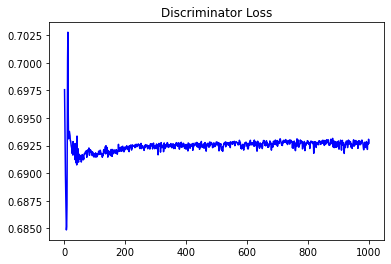

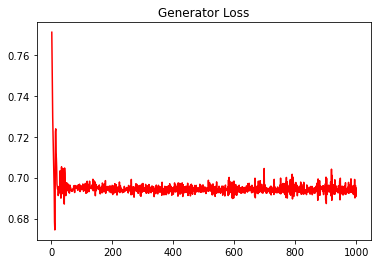

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.066081251565586


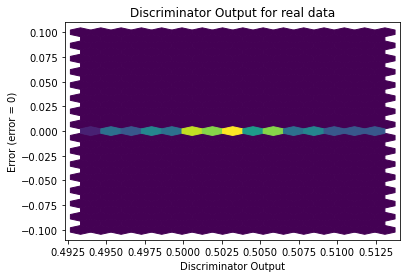

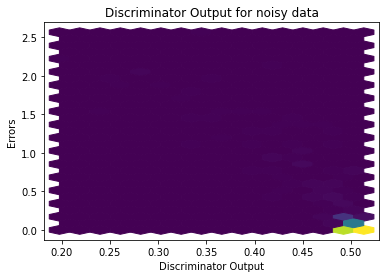

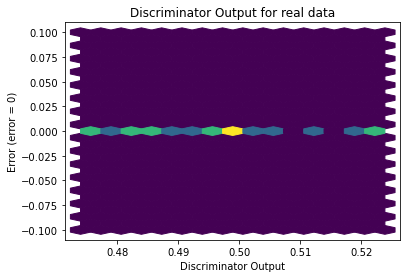

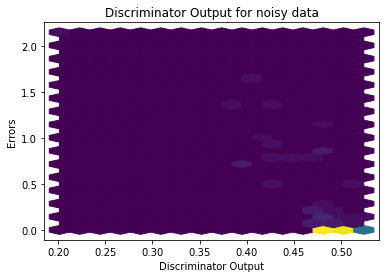

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


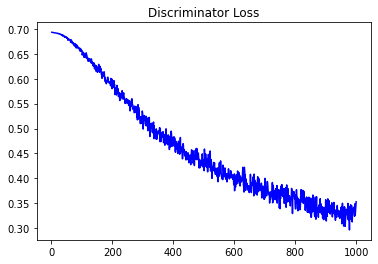

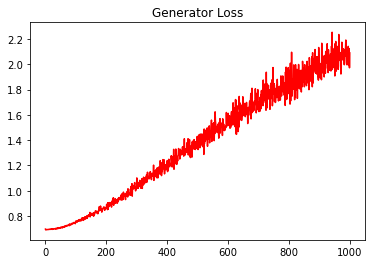

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13813616325912212


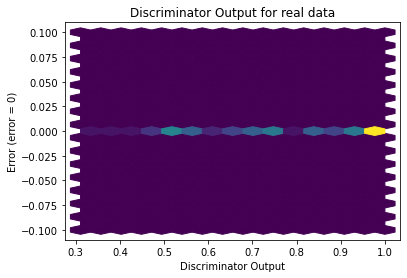

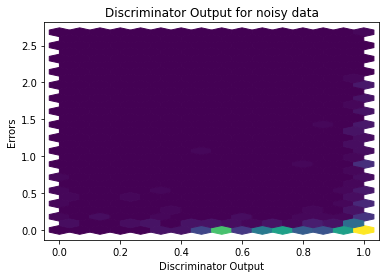

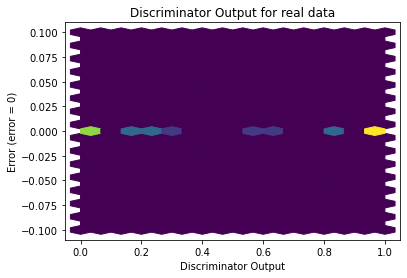

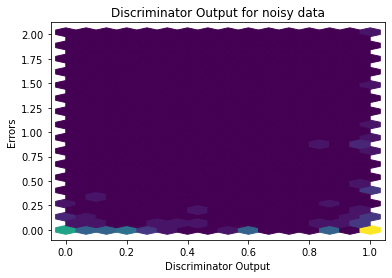

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
